In [1]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls '/gdrive/My Drive/datasets/cats_and_dogs_small/'

test  train  validation


In [3]:
import os 

base_dir = '/gdrive/My Drive/datasets/cats_and_dogs_small/'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test') 

train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
# 제너레이터 연습 

def test_gen(): 
  yield 1
  yield 2 
  yield 3 

gen = test_gen() 

In [5]:
next(gen)

1

In [6]:
next(gen)

2

In [7]:
next(gen)

3

In [8]:
#이미지데이터 제너레이터 
from tensorflow import keras  
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20, 
                                                    target_size=(150,150), 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
image, label = next(train_generator)

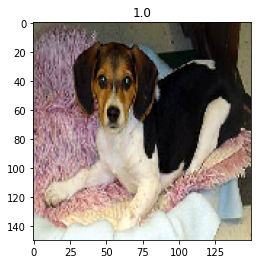

In [10]:
plt.imshow(image[0])
plt.title(label[0])
plt.show()

In [11]:
test_gen = ImageDataGenerator(rescale=1./255.)
test_generator = test_gen.flow_from_directory(test_dir, 
                                              batch_size=20, 
                                              target_size=(150,150), 
                                              class_mode='binary')
validation_generator = test_gen.flow_from_directory(validation_dir, 
                                                    batch_size=20, 
                                                    target_size=(150,150), 
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
#모델링 
from keras import models 
from keras import layers 
from keras import optimizers   #학습률 조정 

model = models.Sequential() 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=100, epochs=100, 
                    validation_data=validation_generator, 
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 789s 8s/step - loss: 0.7258 - accuracy: 0.5129 - val_loss: 0.6660 - val_accuracy: 0.6360
Epoch 2/100
100/100 [==============================] - 13s 126ms/step - loss: 0.6506 - accuracy: 0.6220 - val_loss: 0.6203 - val_accuracy: 0.6650
Epoch 3/100
100/100 [==============================] - 13s 127ms/step - loss: 0.5938 - accuracy: 0.6847 - val_loss: 0.5949 - val_accuracy: 0.6830
Epoch 4/100
100/100 [==============================] - 13s 127ms/step - loss: 0.5331 - accuracy: 0.7517 - val_loss: 0.6575 - val_accuracy: 0.6710
Epoch 5/100
100/100 [==============================] - 13s 126ms/step - loss: 0.5018 - accuracy: 0.7511 - val_loss: 0.6267 - val_accuracy: 0.6700
Epoch 6/100
100/100 [==============================] - 13s 127ms/step - loss: 0.4509 - accuracy: 0.7813 - val_loss: 0.5745 - val_accuracy: 0.6950
Epoch 7/100
100/100 [==============================] - 13s 126ms/step - loss: 0.4080 - accuracy: 0.8218 - val_loss: 0.5878 - v

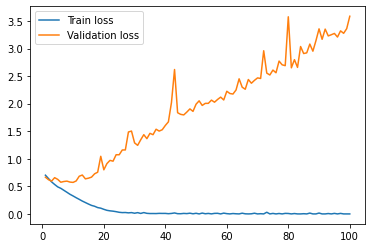

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend() 
plt.show()

In [15]:
# epoch=10 학습 

model = models.Sequential() 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.fit(train_generator, steps_per_epoch=100, epochs=10)

Epoch 1/10
100/100 [==============================] - 10s 88ms/step - loss: 0.7069 - accuracy: 0.5647
Epoch 2/10
100/100 [==============================] - 9s 87ms/step - loss: 0.6105 - accuracy: 0.6685
Epoch 3/10
100/100 [==============================] - 9s 89ms/step - loss: 0.5493 - accuracy: 0.7241
Epoch 4/10
100/100 [==============================] - 9s 89ms/step - loss: 0.4959 - accuracy: 0.7593
Epoch 5/10
100/100 [==============================] - 9s 90ms/step - loss: 0.4542 - accuracy: 0.7904
Epoch 6/10
100/100 [==============================] - 9s 89ms/step - loss: 0.4228 - accuracy: 0.8151
Epoch 7/10
100/100 [==============================] - 9s 89ms/step - loss: 0.3726 - accuracy: 0.8445
Epoch 8/10
100/100 [==============================] - 9s 89ms/step - loss: 0.3218 - accuracy: 0.8746
Epoch 9/10
100/100 [==============================] - 9s 88ms/step - loss: 0.3028 - accuracy: 0.8700
Epoch 10/10
100/100 [==============================] - 9s 89ms/step - loss: 0.2785 - accur

In [16]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 232s 5s/step - loss: 0.6234 - accuracy: 0.7050


[0.6233789324760437, 0.7049999833106995]

In [17]:
#모델 저장 

model.save(base_dir, 'cats_dogs.h5')

INFO:tensorflow:Assets written to: /gdrive/My Drive/datasets/cats_and_dogs_small/assets


In [ ]:
# 슈도코드 
newmodel = models.load_model('cats_dogs.h5')